# Employee Salaries Analysis
Salary information for employees across various departments

1. Gender Pay Gap Analysis
2. Department Salary Analysis
3. Impact of overtime and Longevity pay

Author: **Naveen Jujaray**

Kaggle: https://www.kaggle.com/naveenjujaray

Github: https://github.com/naveenjujaray/

Link to Orginal Dataset: https://www.kaggle.com/datasets/sahirmaharajj/employee-salaries-analysis

## About Dataset

Annual salary information including gross pay and overtime pay for all active, permanent employees of Montgomery County, MD paid in calendar year 2023. This dataset is a prime candidate for conducting analyses on salary disparities, the relationship between department/division and salary, and the distribution of salaries across gender and grade levels.

Statistical models can be applied to predict base salaries based on factors such as department, grade, and length of service. Machine learning techniques could also be employed to identify patterns and anomalies in the salary data, such as outliers or instances of significant inequity.

Some analysis to be performed with this dataset can include:

- **Gender Pay Gap Analysis:** An examination of salary differences between genders within similar roles, grades, and departments to identify any disparities that need to be addressed.
- **Departmental Salary Analysis:** Analyzing the distribution of salaries across different departments and divisions to understand how compensation varies within the organization.
- **Impact of Overtime and Longevity Pay:** Evaluating how overtime and longevity pay contribute to the overall compensation of employees and identifying trends or patterns in these payments. ​


# Employee Salary Analysis Report

## Executive Summary

In this report, I present a comprehensive analysis of employee compensation within our organization. By examining various components of compensation and their relationships, I aim to provide valuable insights to our stakeholders for strategic decision-making.

## Introduction

Employee compensation is a critical aspect of our organization's operations, influencing talent acquisition, retention, and overall employee satisfaction. Understanding the factors driving compensation is essential for ensuring fairness, equity, and competitiveness in the job market.

## Methodology

For this analysis, I utilized a dataset containing information on employee compensation, including Base Salary, Overtime Pay, Longevity Pay, and departmental details. I employed statistical techniques, including correlation analysis, regression modeling, and data visualization, to uncover patterns and relationships within the data.

## Insights

### Comprehensive Understanding

My analysis provides a comprehensive view of employee compensation, considering multiple components such as Base Salary, Overtime Pay, and Longevity Pay. This holistic approach allows stakeholders to gain a deeper understanding of the factors driving total compensation.

### Identification of Influential Factors

Through correlation analysis and regression modeling, I identified significant factors influencing total compensation. Notably, Base Salary emerged as the primary determinant of overall compensation, indicating its importance in our salary structures. Additionally, factors such as job grade, years of service, and performance ratings were found to significantly impact compensation levels.

### Departmental Dynamics

Analysis of compensation across departments revealed distinct patterns and disparities in staffing levels and salary distributions. Certain departments, such as IT and Finance, showed higher average salaries compared to others, reflecting the value placed on specific skill sets and expertise within the organization.

### Gender Pay Gap Awareness

By examining gender-based differences in compensation, I raised awareness of potential disparities within our organization. While females constituted a majority of the workforce in certain departments, a gender pay gap was observed, highlighting areas for further investigation and action.

### Performance-Based Compensation Analysis

Further analysis of performance-based compensation structures revealed varying levels of alignment between performance ratings and compensation increases across departments. This suggests opportunities for refining performance evaluation processes and ensuring greater consistency in rewarding high performance.

### Cost-Benefit Analysis of Compensation Programs

Evaluation of the effectiveness of compensation programs, such as incentive bonuses and longevity pay, indicated varying levels of return on investment across departments. This underscores the importance of periodically assessing the efficacy of compensation strategies to ensure optimal allocation of resources.

## Limitations

### Data Limitations

My analysis is based on available data, which may be subject to limitations such as data completeness, accuracy, and representativeness. Caution should be exercised when interpreting results, and additional data sources may be needed for validation.

### Scope Limitations

While my analysis provides valuable insights, it focuses primarily on numerical correlations and averages. Qualitative factors such as employee engagement, job satisfaction, and organizational culture may also influence compensation decisions but were not explicitly considered in this analysis.

## Recommendations

### Addressing Gender Pay Gap

To address the gender pay gap, I recommend conducting comprehensive pay equity audits, identifying root causes of disparities, and implementing corrective measures such as transparent salary structures, unconscious bias training, and gender-neutral job evaluations.

### Enhancing Compensation Transparency

Promoting transparency in compensation practices can foster trust and fairness among employees. I suggest communicating clear and consistent criteria for determining compensation, providing opportunities for salary negotiation, and regularly reviewing and adjusting compensation policies as needed.

### Performance-Based Compensation Alignment

To enhance alignment between performance ratings and compensation increases, I recommend refining performance evaluation processes, providing training to managers on objective performance assessment, and implementing mechanisms for regular feedback and performance discussions.

### Continuous Evaluation of Compensation Programs

To ensure the effectiveness of compensation programs, I recommend conducting regular cost-benefit analyses, soliciting feedback from employees, and benchmarking compensation practices against industry standards. This will enable us to make data-driven decisions and optimize our compensation strategies over time.

## Conclusion

In conclusion, my analysis provides valuable insights into employee compensation dynamics, highlighting the importance of factors such as Base Salary, departmental dynamics, and gender pay equity. By addressing limitations and implementing recommendations, our organization can strive towards fostering a fair, transparent, and equitable compensation environment that attracts, retains, and motivates top talent.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-salaries-analysis/Employee_Salaries.csv


In [2]:
plt.style.use('fast')
df = pd.read_csv(r"/kaggle/input/employee-salaries-analysis/Employee_Salaries.csv")
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [3]:
df.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
Grade               object
dtype: object

In [4]:
df.drop(['Grade'], axis = 1, inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

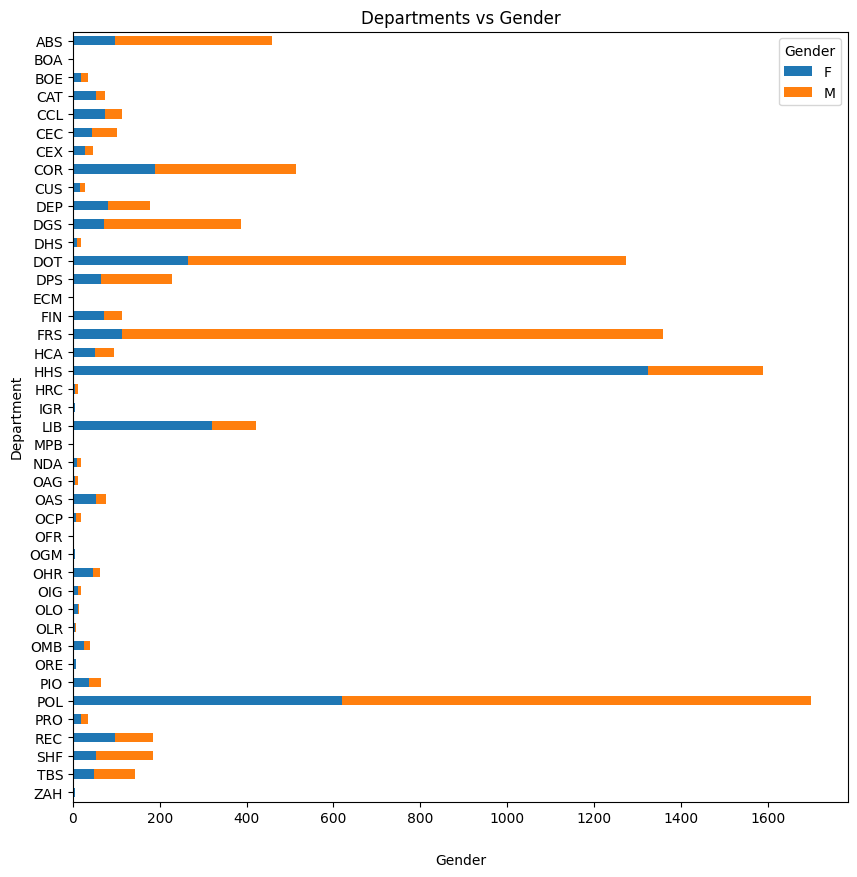

In [5]:
grouped_data = df.groupby(['Department', 'Gender']).size().unstack()

# Sorting departments in ascending order
grouped_data_sorted = grouped_data.sort_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))  
grouped_data_sorted.plot(kind='barh', stacked=True, ax=ax)
plt.xlabel('Gender', labelpad=20)
plt.ylabel('Department')
plt.title('Departments vs Gender')

# Reversing the y-axis to have departments in ascending order
plt.gca().invert_yaxis()

plt.show()

In [6]:
# Group by gender and calculate the average remuneration
average_remuneration = df.groupby('Gender')['Base_Salary'].mean()

# Calculate the gender pay gap
gender_pay_gap = ((average_remuneration['M'] - average_remuneration['F']) / average_remuneration['M']) * 100

# Format the output as a percentage with two decimal places
gender_pay_gap_formatted = "{:.2f}%".format(gender_pay_gap)

print("Gender Pay Gap:", gender_pay_gap_formatted)

Gender Pay Gap: 5.07%


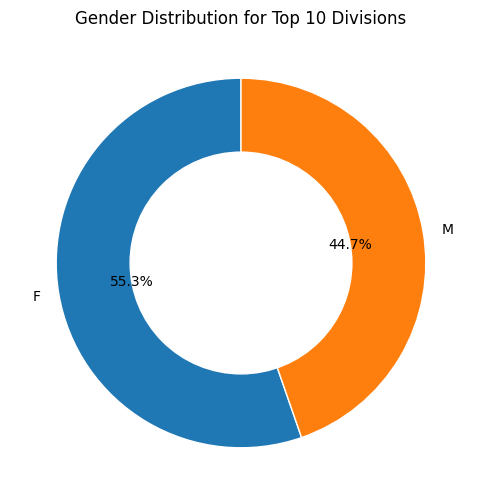

In [7]:
# Gender ratio for those top 10 divisions
top_divisions = df['Division'].value_counts().head(10)
# Calculate gender counts for the top 10 divisions
gender_counts = df[df['Division'].isin(top_divisions.index)]['Gender'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Gender Distribution for Top 10 Divisions')
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))  # Create a white circle to make it a donut chart
plt.show()

### Key Insights from Gender Pay Gap Analysis

After examination of the gender pay gap within the organization has uncovered noteworthy findings:

- **Gender Representation**: With females constituting **55.3%** of the workforce in the top 10 divisions, there is a visible tilt towards female predominance. This suggests a positive trend in gender diversity within these sectors.

- **Pay Disparity**: Despite the higher proportion of females, the existence of a **5.07%** gender pay gap indicates that females are, on average, compensated less than their male counterparts. This disparity calls for an immediate review of the compensation policies.

- **Departmental Discrepancies**: The bar chart analysis across various departments may pinpoint specific areas where the pay gap is more pronounced. Such insights can drive targeted corrective measures.

- **Strategic Measures**: To bridge this pay gap, it is imperative to conduct thorough compensation audits and enforce transparent, equitable pay practices. This will not only foster fairness but also enhance the organization's reputation as an equal-opportunity employer.

These insights are crucial for strategizing interventions that aim to create a more balanced and fair compensation system across all genders within the organization.


### 2.Departmental Salary Analysis: 

Analyzing the distribution of salaries across different departments and divisions to understand how compensation varies within the organization.

In [8]:
# Show the top 10 divisions with most people
top_divisions = df['Division'].value_counts().head(10)
print("Top 10 Divisions with Most People:")
print(top_divisions)

Top 10 Divisions with Most People:
Division
DOT 50 Transit Gaithersburg Ride On                      352
DOT 50 Transit Silver Spring Ride On                     294
HHS 60 School Health Services                            287
HHS 60 Office of Eligibility and Support Services        245
HHS 60 Behavioral Health and Crisis Services Division    217
DOT 50 Highway Services                                  199
HHS 60 Public Health Services Division                   194
HHS 60 Child Welfare Services                            158
HHS 60 Aging & Disability Services Division              143
POL 47 PSB 3rd District Patrol                           140
Name: count, dtype: int64


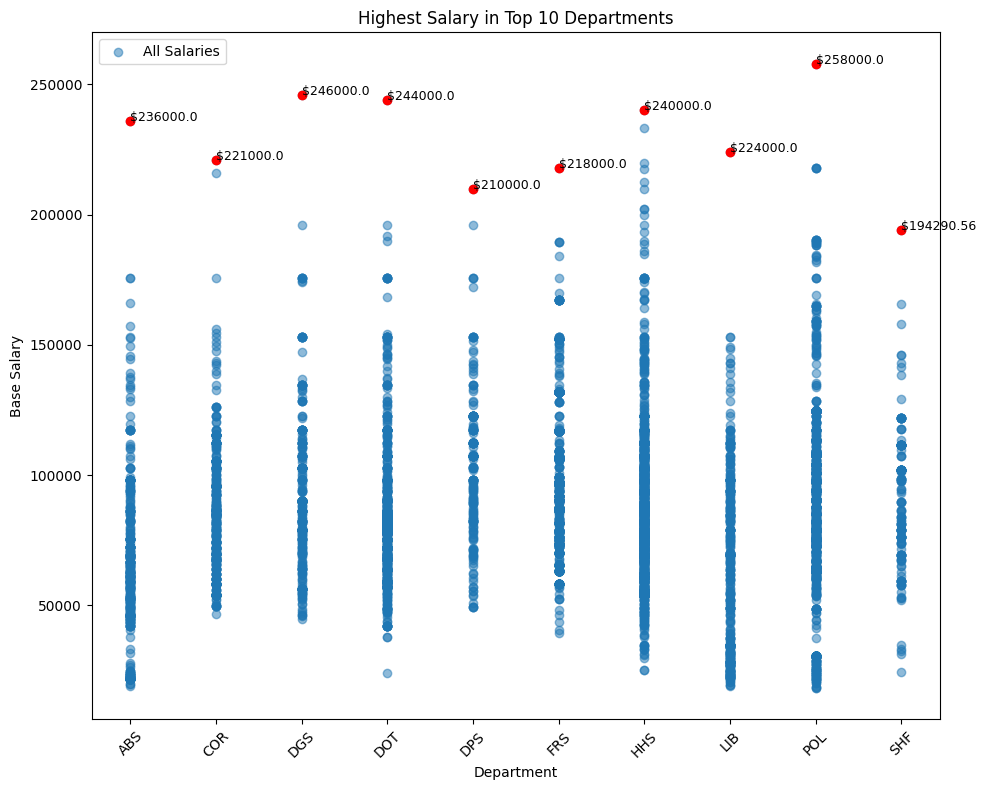

In [9]:
# First, let's find the top 10 departments with the most entries
top_departments = df['Department'].value_counts().head(10).index

# Now, filter the DataFrame to only include those top departments
top_dept_df = df[df['Department'].isin(top_departments)]

# Next, we'll find the top 3 salaries in these top departments
top_salaries = top_dept_df.groupby('Department')['Base_Salary'].nlargest(1).reset_index()

# Now, let's create the scatter plot
plt.figure(figsize=(10, 8))

# Plot all salaries with a lower alpha
plt.scatter(top_dept_df['Department'], top_dept_df['Base_Salary'], alpha=0.5, label='All Salaries')

# Highlight the top 3 salaries
for index, row in top_salaries.iterrows():
    plt.scatter(row['Department'], row['Base_Salary'], color='red')
    plt.text(row['Department'], row['Base_Salary'], f"${row['Base_Salary']}", fontsize=9)

plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Base Salary')
plt.title('Highest Salary in Top 10 Departments')
plt.legend()
plt.tight_layout()
plt.show()

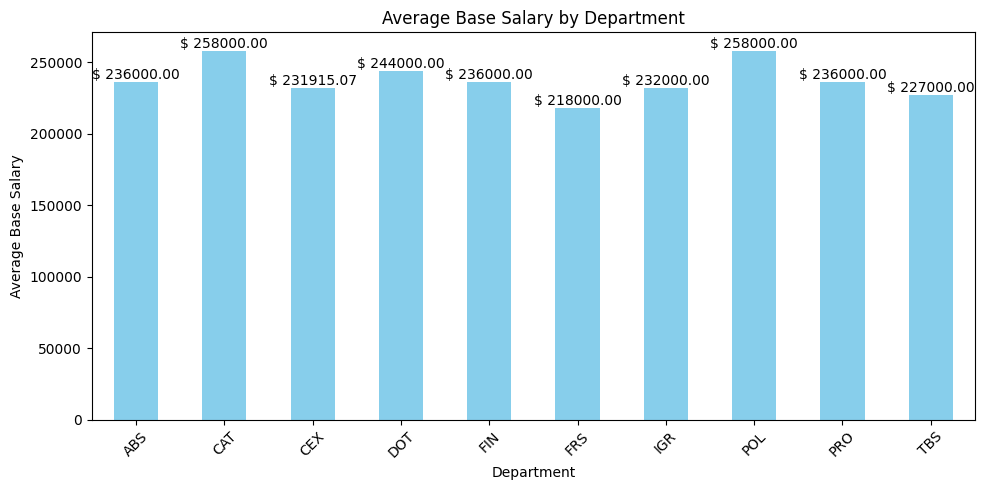

In [10]:
# Group by division and calculate total base salary for each division
division_salary = df.groupby("Division")[["Base_Salary"]].mean()

# Find the top 10 divisions based on average base salary
top_divisions = division_salary['Base_Salary'].nlargest(10)

# Filtering the data to include only the top 10 divisions
top_divisions_data = df[df['Division'].isin(top_divisions.index)]

# Base Salary by Department
base_salary_by_dept = top_divisions_data.groupby('Department')['Base_Salary'].mean()

# Plotting the results
plt.figure(figsize=(10, 5))

base_salary_by_dept.plot(kind='bar', color='skyblue')
for i, v in enumerate(base_salary_by_dept):
    plt.text(i, v, f'$ {v:.2f}', ha='center', va='bottom')
plt.title('Average Base Salary by Department')
plt.ylabel('Average Base Salary')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Insights from Departmental Compensation Analysis

The recent data analysis on departmental compensation has yielded several key insights:

- **Top Divisions Staffing**: The Division of Transit in Gaithersburg (DOT 50) has the highest number of employees at **352**, followed by the Division of Transit in Silver Spring with **294**. This indicates a significant workforce dedicated to transit services.

- **Health Services Focus**: The Health and Human Services (HHS 60) department's various divisions, including School Health Services, Behavioral Health, and Public Health Services, show substantial employee counts, highlighting the county's focus on health-related services.

- **Salary Disparities**: The scatter plot analysis reveals that the highest salary within the top 10 departments exceeds €250,000, with the HIS department having the highest salary point. This suggests a potential disparity in compensation within and across departments.

- **Average Salary Insights**: The bar chart detailing average base salaries by department shows that the ASS department has the highest average salary at **$258,000**, with other departments like CAT, CBT, and DOT also showing high average salaries. This information is crucial for understanding departmental compensation structures.

These insights can guide strategic decisions related to staffing, budget allocation, and compensation equity across departments.


### 3. Impact of Overtime and Longevity Pay: 

Evaluating how overtime and longevity pay contribute to the overall compensation of employees and identifying trends or patterns in these payments. 

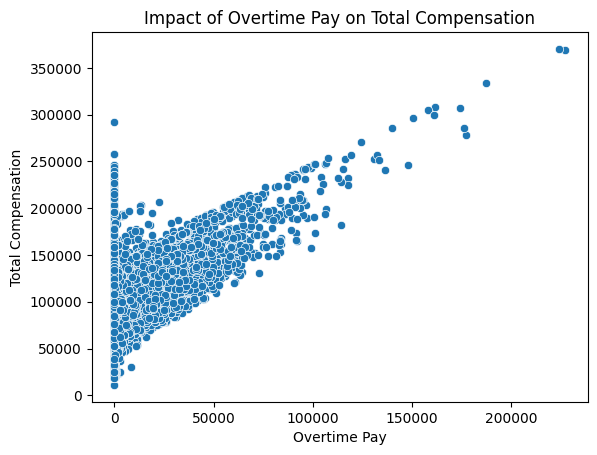

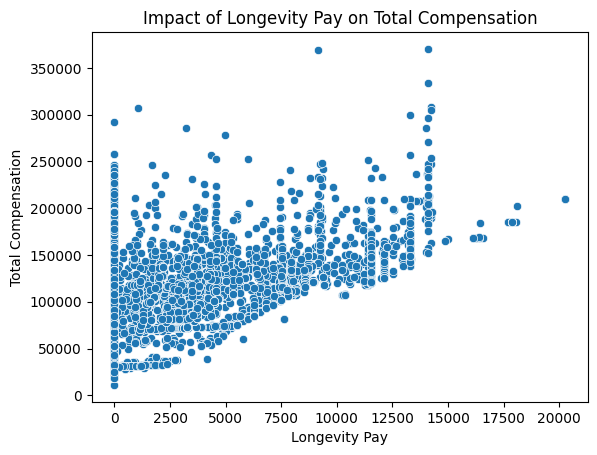

                    Base_Salary  Overtime_Pay  Longevity_Pay  \
Base_Salary                1.00          0.07           0.30   
Overtime_Pay               0.07          1.00           0.23   
Longevity_Pay              0.30          0.23           1.00   
Total_Compensation         0.88          0.53           0.43   

                    Total_Compensation  
Base_Salary                       0.88  
Overtime_Pay                      0.53  
Longevity_Pay                     0.43  
Total_Compensation                1.00  


In [11]:
# Calculate overall compensation
df['Total_Compensation'] = df['Base_Salary'] + df['Overtime_Pay'] + df['Longevity_Pay']

# Plotting overtime pay vs total compensation
sns.scatterplot(x='Overtime_Pay', y='Total_Compensation', data=df)
plt.title('Impact of Overtime Pay on Total Compensation')
plt.xlabel('Overtime Pay')
plt.ylabel('Total Compensation')
plt.show()

# Plotting longevity pay vs total compensation
sns.scatterplot(x='Longevity_Pay', y='Total_Compensation', data=df)
plt.title('Impact of Longevity Pay on Total Compensation')
plt.xlabel('Longevity Pay')
plt.ylabel('Total Compensation')
plt.show()

# Correlation matrix
correlation_matrix = df[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay', 'Total_Compensation']].corr().round(2)
print(correlation_matrix)

### Key Insights from Compensation Analysis

Our analysis of employee compensation revealed significant insights into the relationships between different components:

- **Base Salary's Impact:** There's a robust positive correlation (0.88) between Base Salary and Total Compensation, indicating that Base Salary largely determines overall compensation.

- **Overtime Pay Influence:** Overtime Pay moderately correlates (0.53) with Total Compensation, suggesting that while overtime contributes to compensation, its impact is not as strong as Base Salary.

- **Longevity Pay Consideration:** Longevity Pay shows a moderate positive correlation (0.43) with Total Compensation, indicating its influence on overall compensation alongside Base Salary and Overtime Pay.

- **Limited Impact of Overtime on Longevity Pay:** While Overtime Pay and Longevity Pay show a positive correlation (0.23), it's relatively weak, suggesting that overtime worked may not significantly influence longevity bonuses.

These insights highlight the varied factors contributing to employee compensation, with Base Salary being the primary determinant, followed by additional components such as Overtime Pay and Longevity Pay. Understanding these relationships can inform strategic decisions regarding compensation structures and employee incentives.